# Tutorial 6: ODME_node_link_demand

This tutorial introduces you to the sixth dataset offered by DTALite, which shows the structure of sensor data and the result of ODME with it.
The entire text will cover the following topics:
* Network data: reading and presentation of core data files
* The main programme: running the DTA module of path4gmns
* Results: reading and analysing the output

Before you start, make sure you have the following libraries installed and introduced into the programme:

In [1]:
import pandas as pd
import path4gmns as pg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

path4gmns, version 0.9.7


## 1. Network data
Before proceeding with the path4GMNS-DTA, you can use pandas to read the input data, to see its format or to make changes as your actual requirements.<br>
The following code reads the key input data as a demonstration.<br>

In [2]:
mini_path = "./06_ODME_node_link_demand/minimum_input/"
node = pd.read_csv(mini_path+'node.csv') 
link = pd.read_csv(mini_path+'link.csv')  
demand = pd.read_csv(mini_path+'demand.csv')  #OD-demand
sensor_data = pd.read_csv(mini_path+'sensor_data.csv') 

In [3]:
node

,node_id,x_coord,y_coord,zone_id
0,1,0.0,-0.1,1
1,2,40.3,0.1,2
2,3,19.8,14.8,0
3,4,19.7,-9.7,0


In [4]:
link

,link_id,from_node_id,to_node_id,link_type,dir_flag,length,lanes,free_speed,capacity
0,3,1,4,2,1,15000,1,60,3000
1,4,4,2,2,1,15000,1,60,3000
2,1,1,3,1,1,10000,1,60,4000
3,2,3,2,1,1,10000,1,60,4000


In [5]:
demand

,o_zone_id,d_zone_id,volume
0,1,2,7000


<br>
The file of sensor data provides important information about the measurement sensor, node connections, scenario index, traffic counts, capacity, and data usability. They are crucial for the accurate processing and analysis of the Origin-Destination Matrix Estimation (ODME) and transportation modeling.<br>

The **count** is the observed period volume of the link in the k-th period. And the **activate** indicates the usability of the data(1 means that sensor_data will be used in the ODME  process, and 0 means it will be ignored).<br>

For more details, please check [the user-guide doc of DTALite](https://github.com/asu-trans-ai-lab/DTALite/tree/main/docs/user_guide).

In [6]:
sensor_data

,sensor_id,from_node_id,to_node_id,demand_period,count,scenario_index,activate
0,1,1,4,am,1000,0,1


The following code plots the read road network data into a network diagram to visualise this road network:

In [7]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.DiGraph()           # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)

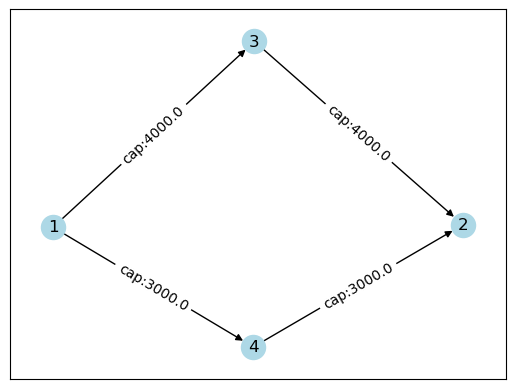

In [8]:
coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))

nx.draw_networkx_nodes(G, npos, node_color="lightblue")  # draw the nodes
nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels

str_cap = ["cap:"+ str('%.1f'% i) for i in list(link['capacity'])]
edge_labels = dict(zip(glink, str_cap))

nx.draw_networkx_edge_labels(G, npos, edge_labels) # show the capacity

plt.rcParams['figure.figsize']= (4, 3) 

This network contains 4 nodes and 4 links, and the traffic demand from origin (node 1) to destination (node 2) is 7000.

## 2.The main programme
After preparing the data, you can run the DTA module of path4GMNS, which is called in a very simple way as shown below.<br>

In [9]:
cd .\06_ODME_node_link_demand\minimum_input

C:\Users\Lenovo\path4GMNS_tutorial\06_ODME_node_link_demand\minimum_input


In [10]:
pg.run_DTALite()


DTALite run starts

DTALite run completes!


In [11]:
!cd

C:\Users\Lenovo\path4GMNS_tutorial\06_ODME_node_link_demand\minimum_input


You can ensure that the program is running correctly by outputting a list of files in the current directory (the directory where pg.dtaapi.run_DTALite is running) and comparing it to the reference output provided by the DTA-user-guide documentation.

In [12]:
files = os.listdir('.')
files

['choice_set_output_0_25nb.csv',
 'demand.csv',
 'demand_file_list.csv',
 'demand_period.csv',
 'departure_time_profile.csv',
 'district_performance_s0_25nb.csv',
 'dynamic_traffic_management.csv',
 'final_summary.csv',
 'link.csv',
 'link_performance_s0_25nb.csv',
 'link_performance_summary.csv',
 'link_performance_summary_2way.csv',
 'link_type.csv',
 'log_DTA.txt',
 'log_label_correcting.txt',
 'log_main.txt',
 'log_scenario.txt',
 'log_shortest_path_tree.csv',
 'log_simulation.txt',
 'log_subarea_focusing.txt',
 'log_traffic_assignment.csv',
 'model_link.csv',
 'model_node.csv',
 'mode_type.csv',
 'node.csv',
 'od_performance_summary.csv',
 'route_assignment_s0_25nb.csv',
 'scenario_index_list.csv',
 'sensor_data.csv',
 'settings.csv',
 'subarea.csv',
 'system_performance_summary.csv',
 'zonal_hierarchy_mapping.csv']

## 3.Results
### a. Route assignment results
This result is output by the programme in route_assignment_[scenarioname].csv. This part presents the feasible routes between the OD pairs, the traffic assignment of each route after DTA, and other data such as route passing time.

In [13]:
route_assignment = pd.read_csv('route_assignment_s0_25nb.csv')
route_assignment

,first_column,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,...,sequential_link_delay,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,
NaN,1,1,2,0,1,1->2,0,auto,am,1015.7193,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,auto,am,5443.5092,...,10.000;10.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# The original document has a line first_column, which will cause data misalignment merger
# Here is to fix the problem of misalignment
col=list(route_assignment.columns)
col.remove('first_column')
col.append('last')
dic=dict(zip(list(route_assignment.columns),col))
route=route_assignment.rename(columns=dic)

Corrected route result:

In [15]:
route

,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,volume,...,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,,last
NaN,1,1,2,0,1,1->2,0,auto,am,1015.7193,...,15.000;15.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,auto,am,5443.5092,...,10.000;10.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the data by column name to see the more intuitive and critical part of the route results. 

In [16]:
route[['route_seq_id','od_pair_key','mode_type','volume','travel_time','node_sequence','link_id_sequence','ODME_volume_before','ODME_volume_after','ODME_volume_diff']]

,route_seq_id,od_pair_key,mode_type,volume,travel_time,node_sequence,link_id_sequence,ODME_volume_before,ODME_volume_after,ODME_volume_diff
NaN,1,1->2,auto,1015.7193,30.0591,1;4;2;,3;4;,1556.4909,1015.7193,-540.7716
NaN,2,1->2,auto,5443.5092,30.2896,1;3;2;,1;2;,5443.5092,5443.5092,0.0000


**EXAMPLE：** <br>
You can organise the results of the route flow assignment into py-dictionary so that you can see all feasible routes. The following dictionary structure has a structure like "index - path nodes", but you can organise the data in other ways as you need.

In [17]:
route_dict = dict(zip(list(route['route_seq_id']),list(route['node_sequence'])))
route_dict

{1: '1;4;2;', 2: '1;3;2;'}

### b. Link assignment results
This result is output by the program in link_assignment_[scenarioname].csv, presenting the assignment on the link.

In [18]:
link_performance = pd.read_csv('link_performance_s0_25nb.csv')
link_performance

,link_seq_id,link_id,vdf_type,from_node_id,to_node_id,lanes,distance_km,distance_mile,fftt,meso_link_id,...,DTM_speed_before,DTM_speed_after,DTM_speed_diff,DTM_DoC_before,DTM_DoC_after,DTM_Doc_diff,DTM_P_before,DTM_P_after,DTM_P_diff,notes
0,1,3,bpr,1,4,1.0,15.0,9.322561,15.0,-1,...,59.882,0.0,-59.882,0.339,0.0,-0.339,0.013,0.0,-0.013,period-based
1,2,4,bpr,4,2,1.0,15.0,9.322561,15.0,-1,...,59.882,0.0,-59.882,0.339,0.0,-0.339,0.013,0.0,-0.013,period-based
2,3,1,bpr,1,3,1.0,10.0,6.215040,10.0,-1,...,39.618,0.0,-39.618,1.361,0.0,-1.361,1.358,0.0,-1.358,period-based
3,4,2,bpr,3,2,1.0,10.0,6.215040,10.0,-1,...,39.618,0.0,-39.618,1.361,0.0,-1.361,1.358,0.0,-1.358,period-based


The attribute ODME_volume_before shows the link volume before ODME, and ODME_volume_after shows the link volume after ODME.As you can see, with the sensor data, the assignment result of volume is more accurate (after ODME).

In [19]:
link_performance[['link_id','from_node_id','to_node_id','volume','ODME_volume_before','ODME_volume_after','ODME_volume_diff']]

,link_id,from_node_id,to_node_id,volume,ODME_volume_before,ODME_volume_after,ODME_volume_diff
0,3,1,4,1015.719,1556.491,1015.719,-540.772
1,4,4,2,1015.719,1556.491,1015.719,-540.772
2,1,1,3,5443.509,5443.509,5443.509,0.000
3,2,3,2,5443.509,5443.509,5443.509,0.000


With the link_performance file and network files(link.csv and node.csv), you can use the following code to get the network with assignment flow result on link.

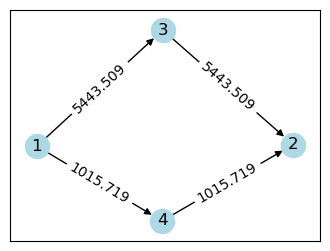

In [20]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.DiGraph()           # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)

coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))
edge_labels = dict(zip(glink, list(link_performance['volume'])))

nx.draw_networkx_nodes(G, npos, node_color="lightblue")  # draw the nodes
nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels
nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels) # show the assignment flow result
plt.rcParams['figure.figsize']= (4, 3) 

Route volume:<br>
    &emsp;1->3->2 :5443.509<br>
    &emsp;1->4->2 :1015.719<br>
Link volume:<br>
    &emsp;1->3 :5443.509<br>
    &emsp;3->2 :5443.509<br>
    &emsp;1->4 :1015.719<br>
    &emsp;4->2 :1015.719

### c. Summary of results
The program outputs various items such as runtime information, assignment results, and system performance to the final_summary.csv file, through which you can get the complete results of each part of the program. 

In [21]:
col_names=[str(i) for i in range(12)]
data = pd.read_csv('final_summary.csv',header=None,names=col_names)

In [22]:
display(data.to_string()) # You can take this approach if you want to see the full table, but it's rather unintuitive

'                                                                                                                                          0                                                                                                                                        1                                                    2                            3                                   4                                        5                    6                    7                   8               9                 10                   11\n0                                                                                    [PROCESS INFO] Step 0: reading scenario_index_list.csv                                                                                                                                      NaN                                                  NaN                          NaN                                 NaN                                      NaN         